In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('data.data')
df.head()
  

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [41]:
X = df[['Size','Bedrooms']].values 

#adding col of 1s
X= np.c_[np.ones((X.shape[0],1)),X]

y = df['Price'].values.reshape(-1,1) 

n = X.shape[0]
d = X.shape[1]

print(n)
print(d)

47
3


In [42]:
size_mean, size_std = X[:,1].mean(), X[:,1].std()  
bed_mean, bed_std = X[:,2].mean(), X[:,2].std()

X[:,1] = (X[:,1] - size_mean) / size_std
X[:,2] = (X[:,2] - bed_mean) / bed_std

print("Mean of Size: {:.2f}". format(X[:,1].mean()))
print("Mean of Bedrooms: {:.2f}". format(X[:,2].mean()))

print("Std of Size: {:.2f}". format(X[:,1].std()))
print("Std of Bedrooms: {:.2f}". format(X[:,2].std()))
pd.DataFrame(X, columns=['_', 'Size', 'Bedrooms']).head()

Mean of Size: 0.00
Mean of Bedrooms: 0.00
Std of Size: 1.00
Std of Bedrooms: 1.00


,_,Size,Bedrooms
0,1.0,0.131415,-0.226093
1,1.0,-0.509641,-0.226093
2,1.0,0.507909,-0.226093
3,1.0,-0.743677,-1.554392
4,1.0,1.271071,1.102205


In [43]:
print("Mean of Price : {:.2f}". format(y[:,0].mean()))
print("Std of Price: {:.2f}". format(y[:,0].std()))
pd.DataFrame(y, columns=[ 'Price']).head()

Mean of Price : 340412.66
Std of Price: 123702.54


,Price
0,399900
1,329900
2,369000
3,232000
4,539900


In [44]:
def initialize_betas(X,y):
    np.random.seed(0)
    betas = np.random.randn(d,1)
    return betas

betas = initialize_betas(X,y)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]]


In [45]:
def calculate_cost(betas):
    m = len(X)
    cost = 1/(2*m) *np.sum(np.square(np.dot(X,betas)-y))
    return cost

print("the cost with random betas:", calculate_cost(betas))

the cost with random betas: 65590851735.15869


In [46]:
def calculate_gradient(betas):
    m = len(X)
    gradient = np.dot(X.T,(np.dot(X,betas)-y)) / m
    return gradient


print("the gradient with random betas: \n", calculate_gradient(betas))

the gradient with random betas: 
 [[-340410.89552212]
 [-105763.18527443]
 [ -54707.61894297]]


In [1]:
def gradient(X,y,alpha= 0.01,max_iters=10000,precision=1e-3):
    iteration = 0
    difference = 1 
    betas= initialize_betas(X,y)
    cost = calculate_cost(betas)
    costs =[calculate_cost(betas)]


    while difference > precision and iteration <= max_iters :
        betas = betas - alpha * calculate_gradient(betas)
        cost = calculate_cost(betas)

        difference = np.abs(costs[iteration]-cost)
        costs.append(cost)

        print("iteration: {}, cost: {}".format(iteration, cost))
        iteration+=1

        if (cost==np.infty):
            print("reached limit")
            break

    return betas, iteration, costs



In [48]:
betas, iteration,costs = gradient(X,y)

iteration: 0, cost: 64297095125.53332
iteration: 1, cost: 63030352081.95928
iteration: 2, cost: 61790042581.81225
iteration: 3, cost: 60575599487.23835
iteration: 4, cost: 59386468246.94712
iteration: 5, cost: 58222106605.23493
iteration: 6, cost: 57081984318.054955
iteration: 7, cost: 55965582875.95414
iteration: 8, cost: 54872395233.70338
iteration: 9, cost: 53801925546.45086
iteration: 10, cost: 52753688912.233376
iteration: 11, cost: 51727211120.68498
iteration: 12, cost: 50722028407.785965
iteration: 13, cost: 49737687216.500435
iteration: 14, cost: 48773743963.15349
iteration: 15, cost: 47829764809.40367
iteration: 16, cost: 46905325439.67047
iteration: 17, cost: 46000010843.879135
iteration: 18, cost: 45113415105.3902
iteration: 19, cost: 44245141193.98347
iteration: 20, cost: 43394800763.77011
iteration: 21, cost: 42562013955.909805
iteration: 22, cost: 41746409206.013
iteration: 23, cost: 40947623056.111534
iteration: 24, cost: 40165299971.08392
iteration: 25, cost: 3939909215

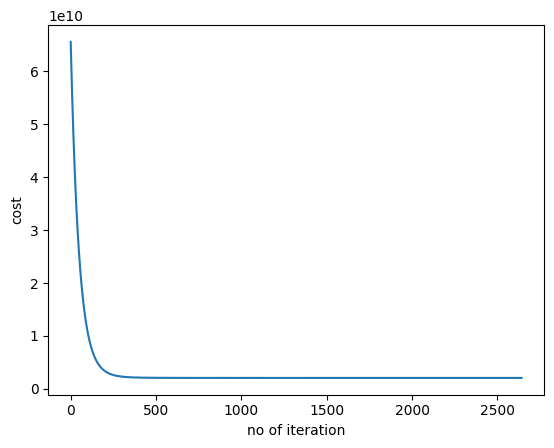

In [49]:
plt.plot(costs)
plt.xlabel("no of iteration")
plt.ylabel("cost")

plt.show()

In [50]:
print("betas:\n",betas)

betas:
 [[340412.65957347]
 [109447.29131538]
 [ -6577.8496999 ]]


In [51]:
def predict(size,bedrooms):
    intercept = betas[0]
    coef_size = betas[1]
    coef_bedrooms = betas[2]

    price = 1*intercept + coef_size * size + coef_bedrooms * bedrooms
    return price

In [52]:
def standadize(data,mean,std):
    output = (data-mean)/std
    return output

In [53]:
import random
for i in range(10):
    size = random.randint(800,4500)
    bed = random.randint(1,8)

    st_size = standadize(size,size_mean,size_std)
    st_bed = standadize(bed,bed_mean,bed_std)

    predicted = predict(st_size,st_bed)

    print(f'the price of the house of size {size} and no of bedrooms {bed} is : {int(predicted)}')

the price of the house of size 3679 and no of bedrooms 7 is : 540589
the price of the house of size 1127 and no of bedrooms 4 is : 211537
the price of the house of size 4250 and no of bedrooms 2 is : 663765
the price of the house of size 3518 and no of bedrooms 7 is : 518176
the price of the house of size 2847 and no of bedrooms 3 is : 459715
the price of the house of size 3739 and no of bedrooms 5 is : 566416
the price of the house of size 2473 and no of bedrooms 4 is : 398914
the price of the house of size 3523 and no of bedrooms 6 is : 527609
the price of the house of size 4350 and no of bedrooms 8 is : 625261
the price of the house of size 3407 and no of bedrooms 2 is : 546410


C:\Users\User\AppData\Local\Temp\ipykernel_2976\1070991663.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'the price of the house of size {size} and no of bedrooms {bed} is : {int(predicted)}')


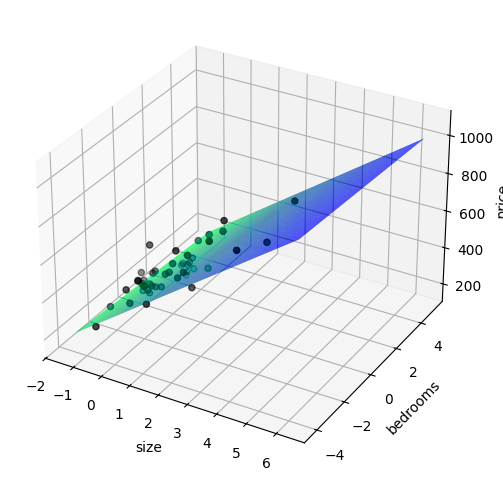

In [54]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot( projection='3d')

#set labels
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')

#creating a meshgrid
xx, yy = np.meshgrid(range(1000,7000),range(0,8))

#normalize
xx = (xx-size_mean)/size_std
yy = (yy-bed_mean)/bed_std

#plotting normalized data
ax.scatter((df['Size']-size_mean)/size_std, (df['Bedrooms']-bed_mean)/bed_std,df['Price']/1000, c='black', marker='o')

z = betas[0] + betas[1] * xx + betas[2] * yy

ax.plot_surface(xx,              # X co-ordinates
                yy,              # Y co-ordinates
                z/1000,          # Z co-ordinates 
                cmap='winter_r', # Color Map
                rstride=1, 
                cstride=1) 
